# Signal-to-noise ratio

This notebook analysis the signal-to-noise ratio of different conditions and methods

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Signal-to-noise of cell lines

In [5]:
data = dict()

df = pd.read_csv("../../2_NASCseq/reports/NASCseq_Summary.tsv", sep="\t")
df = df[df["Run"].isin(['20220113_NASCseq_K562', '20220321_NASCseq_K562', '20220418_NASCseq_K562'])]
d1 = df[(df["s4U"] == 0) & (df["Time"] == 3)]
d2 = df[(df["s4U"] == 50) & (df["Time"] == 3)]
print(len(d1), len(d2))
data["NASCseq.K562,0uM,3h"] = d1[["Pe", "Pc", "Pc_Pe"]]
data["NASCseq.K562,50uM,3h"] = d2[["Pe", "Pc", "Pc_Pe"]]

runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TC.Ratio"] >= 0.008)]
print(len(d1), len(d2))
data["K562,0uM,3h"] = d1[["Pe", "Pc", "Pc_Pe"]]
data["K562,50uM,3h"] = d2[["Pe", "Pc", "Pc_Pe"]]

runs = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TC.Ratio"] >= 0.01)]
print(len(d1), len(d2))
data["mESC,0uM,3h"] = d1[["Pe", "Pc", "Pc_Pe"]]
data["mESC,400uM,3h"] = d2[["Pe", "Pc", "Pc_Pe"]]

39 38
97 89
22 39


1.159188018445948 68.32442984150867
1.0815322548496746 192.97012205145265
1.058906294043891 134.37077162414715


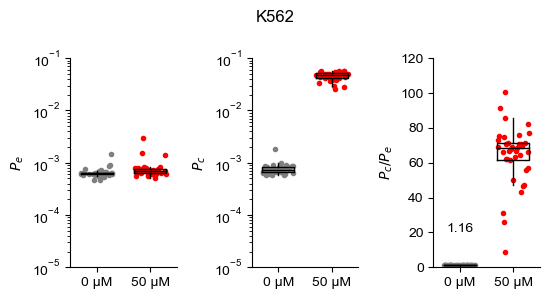

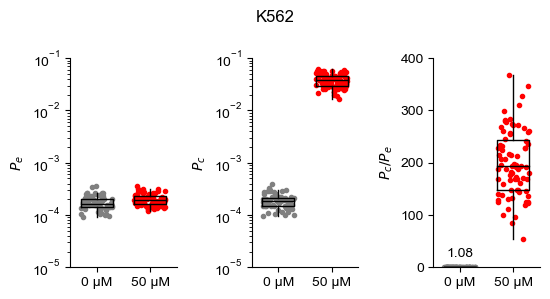

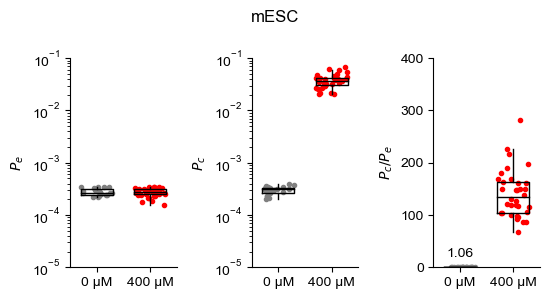

In [19]:
for cell_line in ["NASCseq.K562", "K562", "mESC"]:
    if cell_line == "NASCseq.K562":
        s4u = 50
        d1 = data["NASCseq.K562,0uM,3h"]
        d2 = data["NASCseq.K562,50uM,3h"]
        ticks = ["0 μM", "50 μM"]
    elif cell_line == "K562":
        s4u = 50
        d1 = data["K562,0uM,3h"]
        d2 = data["K562,50uM,3h"]
        ticks = ["0 μM", "50 μM"]
    else:
        s4u = 400
        d1 = data["mESC,0uM,3h"]
        d2 = data["mESC,400uM,3h"]
        ticks = ["0 μM", "400 μM"]
        
    d1 = d1[~(d1["Pe"].isna() | d1["Pc"].isna())]
    d2 = d2[~(d2["Pe"].isna() | d2["Pc"].isna())]
        
    np.random.seed(0)

    pc1, pe1 = d1["Pc"], d1["Pe"]
    pc2, pe2 = d2["Pc"], d2["Pe"]
    
    colors = ["grey", "red"]
    
    w = 0.6
        
    fig, axs = plt.subplots(1, 3, figsize=(5.6, 3))
    fig.suptitle(cell_line.split(".")[-1])
    
    plt.sca(axs[0])
    ys_list = [pe1, pe2]
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    plt.ylim(0.00001, 0.1)
    # plt.ylabel(r"$\it{P}$$_{\mathit{e}}$")
    # plt.ylabel(r"${\it{P}}_{\mathit{e}}$")
    plt.ylabel(r'$P_e$')
    
    plt.sca(axs[1])
    ys_list = [pc1, pc2]
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    plt.ylim(0.00001, 0.1)
    plt.ylabel(r'$P_c$')
    
    plt.sca(axs[2])
    ys_list = [pc1 / pe1, pc2 / pe2]
    print(np.median(ys_list[0]), np.median(ys_list[1]))
    plt.boxplot(ys_list, positions=[0, 1], widths=w, 
                showcaps=False, showfliers=False, medianprops={"color": "black"})
    for x, ys in enumerate(ys_list):
        xs = np.random.rand(len(ys)) * w + x - w/2
        plt.scatter(xs, ys, marker=".", color=colors[x])
    plt.text(0, 20, "%.2f" % np.median(ys_list[0]), ha="center")
    # plt.gca().set_yscale("log")
    plt.xticks([0, 1], ticks)
    if cell_line == "NASCseq.K562":
        ylim = 120
    else:
        ylim = 400
    plt.ylim(0, ylim)
    plt.ylabel(r'$P_c/P_e$')

    for ax in axs:
        for loc in ["top", "right"]:
            ax.spines[loc].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("figures/signal_to_noise.%s.pdf" % cell_line)
    # break

## 2. Comprehensive comparison

In [74]:
data = dict()
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TC.Ratio"] >= 0.008)]
print(len(d1), len(d2))
data["NanoNASC-seq,0uM,3h"] = d1
data["NanoNASC-seq,50uM,3h"] = d2

97 89


In [75]:
d3 = d1.copy()
d4 = d2.copy()
for d5 in [d3, d4]:
    pe_list = []
    pc_list = []
    for cell in d5["Cell"]:
        path = "results/linkage_consensus/%s.pc.tsv" % cell
        if os.path.exists(path):
            df = pd.read_csv(path, sep="\t", header=0)
            pe = df["Pe"].values[0]
            pc = df["Pc"].values[0]
        else:
            pe = np.nan
            pc = np.nan
        pe_list.append(pe)
        pc_list.append(pc)
    d5["Pe"] = pe_list
    d5["Pc"] = pc_list
    d5["Pc_Pe"] = d5["Pc"] / d5["Pe"]
data["NanoNASC-seq,0uM,3h,linkage"] = d3
data["NanoNASC-seq,50uM,3h,linkage"] = d4

In [78]:
def load_pc(d):
    array = []
    for run, cell in d[["Run", "Cell"]].values:
        path = "../../2_NASCseq/results/signal2noise/pc/%s/%s.tsv" % (run, cell)
        m = pd.read_csv(path, sep="\t", header=0)
        array.append(m)
    return pd.concat(array)

d = pd.read_csv("../../2_NASCseq/reports/NASCseq_Summary.tsv", sep="\t")
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "PE")]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["Layout"] == "PE")]
d3 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "SE")]
d4 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["Layout"] == "SE")]
d5 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 1) & (d["Layout"] == "PE") & (d["Run"] == "GSE128273_NASCseq_K562")]
print(len(d1), len(d2), len(d3), len(d4), len(d5))
data["NASC-seq,0uM,3h"] = d1
data["NASC-seq,50uM,3h"] = d2
data["GSE128273,0uM,3h,SE"] = d3
data["GSE128273,50uM,3h,SE"] = d4
data["GSE128273,50uM,1h"] = d5

39 38 16 80 142


--------------------------------------------------------------------------------
Mean: 1.2536617856789807
Median: 1.290618759124648
--------------------------------------------------------------------------------
Mean: 14.668574837239882
Median: 11.672290266542522
--------------------------------------------------------------------------------
Mean: 34.86315896156101
Median: 36.642347239532654
--------------------------------------------------------------------------------
Mean: 1.1737896204243323
Median: 1.1591880184459284
--------------------------------------------------------------------------------
Mean: 64.47894678115946
Median: 68.32442984149998
--------------------------------------------------------------------------------
Mean: 1.0817475598443878
Median: 1.0815322548496749
--------------------------------------------------------------------------------
Mean: 199.27246219031812
Median: 192.97012205145262


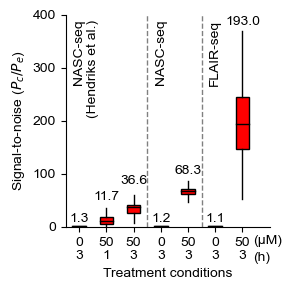

In [79]:
array = []

ys = data["GSE128273,0uM,3h,SE"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,1h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,3h,SE"]["Pc_Pe"]
array.append(ys[~ys.isna()])

ys = data["NASC-seq,0uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["NASC-seq,50uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])

ys = data["NanoNASC-seq,0uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["NanoNASC-seq,50uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])

colors = ["grey", "red", "red", "grey", "red", "grey", "red"]

plt.figure(figsize=(3, 3))
# plt.boxplot(array, showcaps=False, showfliers=False)
w = 0.5
text_ys = [10, 50, 80, 10, 100, 10, 380]
for i, ys in enumerate(array):
    print("-" * 80)
    print("Mean:", np.mean(ys))
    print("Median:", np.median(ys))
    plt.boxplot([array[i]], positions=[i], widths=w, patch_artist=True, 
        showcaps=False, 
        boxprops={"facecolor": colors[i]},
        medianprops={"color": "black"},
        showfliers=False, 
        flierprops={"markerfacecolor": colors[i], "markeredgecolor": "none", "marker": "."})
    plt.text(i, text_ys[i], round(np.median(ys), 1), ha="center")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["0\n3", "50\n1", "50\n3", "0\n3", "50\n3", "0\n3", "50\n3"])
plt.axvline(2.5, lw=1, ls="--", color="grey")
plt.axvline(4.5, lw=1, ls="--", color="grey")

plt.text(0, 390, "NASC-seq", rotation=90, va="top", ha="center")
plt.text(0.5, 390, "(Hendriks et al.)", rotation=90, va="top", ha="center")
plt.text(3, 390, "NASC-seq", rotation=90, va="top", ha="center")
plt.text(5, 390, "FLAIR-seq", rotation=90, va="top", ha="center")

plt.text(6.4, -33, "(μM)")
plt.text(6.4, -65, "(h)")
plt.xlim(-0.5, 7)
plt.ylim(0, 400)
plt.xlabel("Treatment conditions")
plt.ylabel(r"Signal-to-noise ($P_c/P_e$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/comparison.pc_pe.pdf")

--------------------------------------------------------------------------------
Mean: 1.2536617856789807
Median: 1.290618759124648
--------------------------------------------------------------------------------
Mean: 14.668574837239882
Median: 11.672290266542522
--------------------------------------------------------------------------------
Mean: 34.86315896156101
Median: 36.642347239532654
--------------------------------------------------------------------------------
Mean: 1.1737896204243323
Median: 1.1591880184459284
--------------------------------------------------------------------------------
Mean: 64.47894678115946
Median: 68.32442984149998
--------------------------------------------------------------------------------
Mean: 1.0817475598443878
Median: 1.0815322548496749
--------------------------------------------------------------------------------
Mean: 199.27246219031812
Median: 192.97012205145262
-------------------------------------------------------------------------

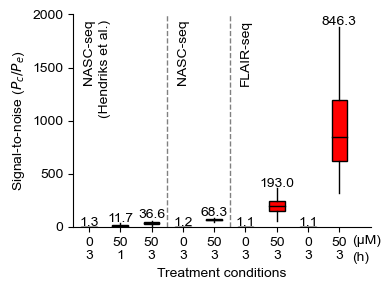

In [90]:
array = []

ys = data["GSE128273,0uM,3h,SE"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,1h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["GSE128273,50uM,3h,SE"]["Pc_Pe"]
array.append(ys[~ys.isna()])

ys = data["NASC-seq,0uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["NASC-seq,50uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])

ys = data["NanoNASC-seq,0uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["NanoNASC-seq,50uM,3h"]["Pc_Pe"]
array.append(ys[~ys.isna()])

ys = data["NanoNASC-seq,0uM,3h,linkage"]["Pc_Pe"]
array.append(ys[~ys.isna()])
ys = data["NanoNASC-seq,50uM,3h,linkage"]["Pc_Pe"]
array.append(ys[~ys.isna()])

colors = ["grey", "red", "red", "grey", "red", "grey", "red", "grey", "red"]

plt.figure(figsize=(4, 3))
w = 0.5
text_ys = [10, 50, 80, 10, 100, 10, 380, 10, 1900]
for i, ys in enumerate(array):
    print("-" * 80)
    print("Mean:", np.mean(ys))
    print("Median:", np.median(ys))
    plt.boxplot([array[i]], positions=[i], widths=w, patch_artist=True, 
        showcaps=False, 
        boxprops={"facecolor": colors[i]},
        medianprops={"color": "black"},
        showfliers=False, 
        flierprops={"markerfacecolor": colors[i], "markeredgecolor": "none", "marker": "."})
    plt.text(i, text_ys[i], round(np.median(ys), 1), ha="center")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ["0\n3", "50\n1", "50\n3", "0\n3", "50\n3", "0\n3", "50\n3", "0\n3", "50\n3"])
plt.axvline(2.5, lw=1, ls="--", color="grey")
plt.axvline(4.5, lw=1, ls="--", color="grey")

xlim = 9
ylim = 2000
plt.text(0, 0.975*ylim, "NASC-seq", rotation=90, va="top", ha="center")
plt.text(0.5, 0.975*ylim, "(Hendriks et al.)", rotation=90, va="top", ha="center")
plt.text(3, 0.975*ylim, "NASC-seq", rotation=90, va="top", ha="center")
plt.text(5, 0.975*ylim, "FLAIR-seq", rotation=90, va="top", ha="center")

plt.text(8.4, -0.0825*ylim, "(μM)")
plt.text(8.4, -0.1625*ylim, "(h)")
plt.xlim(-0.5, xlim)
plt.ylim(0, ylim)
plt.xlabel("Treatment conditions")
plt.ylabel(r"Signal-to-noise ($P_c/P_e$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
# plt.savefig("figures/comparison.pc_pe.pdf")

# 20240731 Linkage consensus mismatch ratio

In [43]:
import os
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d = d[[x in runs for x in d["Run"]]]
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000) & (d["TC.Ratio"] >= 0.008)]

In [39]:
def change_counts(vs):
    vs1 = []
    for v in vs:
        if v < 2:
            v = 0
        vs1.append(v)
    return vs1
    
for cell in d["Cell"]:
    path1 = "../../1_FLAIRseq/results/mismatch/ratio_consensus/%s/%s.events.tsv" % (cell.split(".")[0], cell)
    path2 = "results/linkage_consensus/%s.events.tsv" % cell
    path3 = "results/linkage_consensus/%s.ratio.tsv" % cell
    if not os.path.exists(path2):
        df = pd.read_csv(path1, sep="\t")
        for c in df.columns[-12:]:
            df[c] = change_counts(df[c])
        df.to_csv(path2, sep="\t", index=False)
        df = df[df["Size"] >= 2]
        with open(path3, "w+") as fw:
            fw.write("Type\tRefBase\tAltBase\tBaseCount\tEventCount\tRatio\n")
            for c in df.columns[-12:]:
                a = df[c[0]].sum()
                b = df[c].sum()
                r = b / a
                fw.write("\t".join(map(str, [c[0] + c[2], c[0], c[2], a, b, r])) + "\n")

/home/chenzonggui/tmp/ipykernel_29143/2988445031.py:25: RuntimeWarning: invalid value encountered in long_scalars
  r = b / a


In [40]:
# mismatch ratios
array = []
for cell in d1["Cell"]:
    path = "results/linkage_consensus/%s.ratio.tsv" % cell
    s = pd.read_csv(path, sep="\t", index_col=0)["Ratio"]
    s.name = cell
    array.append(s)
m = pd.DataFrame(array)
m.index.name = "Cell"

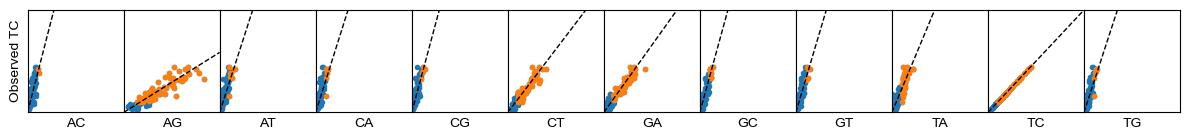

   Type         K         R
0    AC  3.647410 -1.000000
1    AG  0.586024  0.865386
2    AT  2.907173  0.413768
3    CA  2.968037  0.531236
4    CG  3.482013  0.638875
5    CT  1.230584  0.892855
6    GA  1.311633  0.921731
7    GC  3.418068  0.376233
8    GT  3.156837  0.366562
9    TA  2.245596  0.588425
10   TC  1.000000  1.000000
11   TG  2.872469  0.701831
Model:
  Type         K         R         W
1   AG  0.586024  0.865386  0.322909
5   CT  1.230584  0.892855  0.333158
6   GA  1.311633  0.921731  0.343933
Custom strategy:
K: 0.9742, R: 0.9635


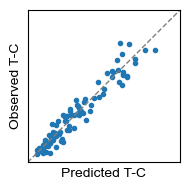

NASC-seq strategy:
K: 1.2633, R: 0.9590


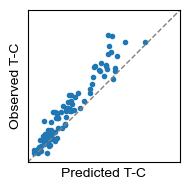

GRAND-SLAM strategy:
K: 2.6613, R: 0.9018


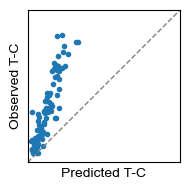

In [41]:
# mismatch types
mtypes = []
bases = "ACGT"
for b1 in "ACGT":
    for b2 in "ACGT":
        if b1 != b2:
            mtypes.append("%s%s" % (b1, b2))

# linear fitting
lim = m.max().max() * 1.2
fig, axs = plt.subplots(1, 12, figsize=(12, 1.5), sharex=True, sharey=True, gridspec_kw=dict(wspace=0))
rows = []
for i, mtype in enumerate(mtypes):
    ax = axs[i]
    plt.sca(ax)
    xs = m[mtype]
    ys = m["TC"]
    flags = (xs > lim * 0.1) & (ys > lim * 0.1)
    xs1 = xs[flags]
    ys1 = ys[flags]
    r = np.corrcoef(xs1, ys1)[0][1]
    k = np.e ** ((sum(np.log(ys1)) - sum(np.log(xs1))) / len(xs1))
    rows.append([mtype, k, r])
    plt.scatter(xs, ys, marker=".")
    plt.scatter(xs1, ys1, marker=".")
    plt.plot([0, lim], [0, lim * k], lw=1, ls="--", color="black")
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(mtype)
    if i == 0:
        plt.ylabel("Observed TC")
plt.tight_layout()
plt.show()
plt.close()

# model
model = pd.DataFrame(rows, columns=["Type", "K", "R"])
print(model)
model = model[(model["Type"] != "TC") & (model["R"] >= 0.8)]
model["W"] = model["R"] / model["R"].sum()
model.to_csv("results/Estimate.Pe.Model.linkage_consensus.K562.tsv", sep="\t", index=False)
print("Model:")
print(model)

# predict pe
array = []
for t, k, r, w in model.values:
    array.append(m[t] * k * w)
m1 = m.copy()
m1["Pe"] = pd.DataFrame(array).sum(axis=0)

params = [
    ["Custom", m1["Pe"], m1["TC"]],
    ["NASC-seq", (m1["CT"] + m1["GA"]) / 2, m1["TC"]],
    ["GRAND-SLAM",(m1["TA"] + m1["TG"]) / 2, m1["TC"]],
]
for name, xs, ys in params:
    print("%s strategy:" % name)
    lim = max(max(xs), max(ys)) * 1.2
    r = np.corrcoef(xs, ys)[0][1]
    k = np.e ** ((sum(np.log(ys)) - sum(np.log(xs))) / len(xs))
    print("K: %.4f, R: %.4f" % (k, r))
    plt.figure(figsize=(2, 2))
    plt.scatter(xs, ys, marker=".")
    plt.plot([0, lim], [0, lim], lw=1, ls="--", color="grey")
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Predicted T-C")
    plt.ylabel("Observed T-C")
    plt.tight_layout()
    plt.show()
    plt.close()